## Merging Tweet CSVs for NLP in Stock Market Manipulation Detection

In [3]:
import os
import pandas as pd
from tqdm import tqdm

current_dir = os.getcwd()

while 'Stock-Market-Manipulation-Detection-via-Tweet-Analysis' not in os.path.basename(current_dir):
    current_dir = os.path.dirname(current_dir)

main_directory = current_dir

folder_path = os.path.join(main_directory, 'data', 'raw', 'tweets_split_data')

print(f"Constructed folder path: {folder_path}")

if os.path.exists(folder_path):
    print(f"Successfully navigated to: {folder_path}")
    
    dfs = []
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    for filename in tqdm(csv_files, desc="Merging CSV files"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path, on_bad_lines='skip')  # Skip bad lines
            dfs.append(df)
        except pd.errors.ParserError as e:
            print(f"Error parsing file {filename}: {e}")
            continue

    merged_df = pd.concat(dfs, ignore_index=True)

    merged_file_path = os.path.join(main_directory, 'data', 'tweets_merged_data.csv')

    merged_df.to_csv(merged_file_path, index=False)

    print(f"Merged CSV file saved to: {merged_file_path}")
else:
    print("Error: The folder path does not exist.")

Constructed folder path: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\raw\tweets_split_data
Successfully navigated to: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\raw\tweets_split_data


Merging CSV files: 100%|███████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.76it/s]


Merged CSV file saved to: C:\Users\Dell\Desktop\Stock-Market-Manipulation-Detection-via-Tweet-Analysis\data\tweets_merged_data.csv


## Data Wrangling: Cleaning and Preparing Twitter Data for Stock Market Manipulation Detection

In [9]:
data=merged_df
data.head()

,Date,Tweet Count,Username,Text,Created At,Retweets,Likes,Date Collected,Tweet_count
0,2022-01-04,1,ms.valentines ₍ᵔ·͈༝·͈ᵔ₎,ไม่พูดไม่ได้ adidas ลดเยอะมากก ทั้งรุ่นคลาสสิก...,Tue Jan 04 13:51:12 +0000 2022,209.0,270.0,NaN,NaN
1,2022-01-04,2,RubenTrades,WHAT A DAAAAAY!\n \nTraded with some awesome t...,Tue Jan 04 23:54:39 +0000 2022,2.0,72.0,NaN,NaN
2,2022-01-04,3,Breakout Charts ®️,Stocks to Watch out\n\n1. Hind Copper\n2. Fluo...,Tue Jan 04 14:27:06 +0000 2022,40.0,424.0,NaN,NaN
3,2022-01-04,4,mignolet,"옵션 Implied Volatility을 보면, 곧 큰 변동성이 나타날 가능성이 높...",Tue Jan 04 01:01:24 +0000 2022,23.0,200.0,NaN,NaN
4,2022-01-04,5,レイチェル,おはようございます。主要3指数はまちまちの展開。ダウは2日連続での最高値更新。一方ナスダック...,Tue Jan 04 21:45:57 +0000 2022,40.0,486.0,NaN,NaN


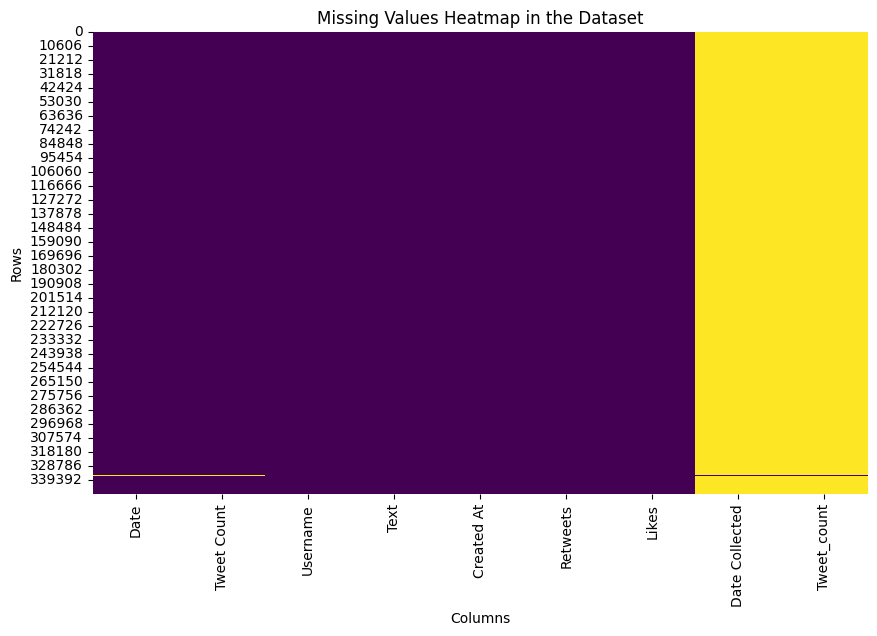

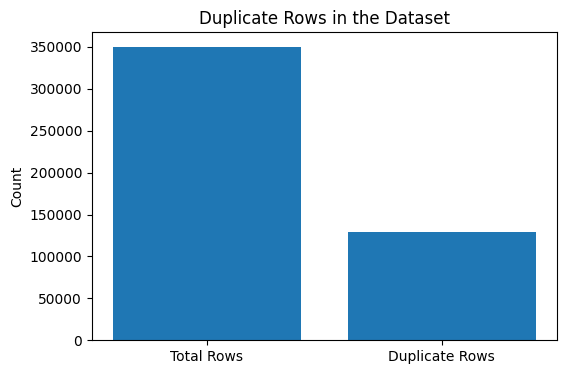

NameError: name 'data_cleaned' is not defined

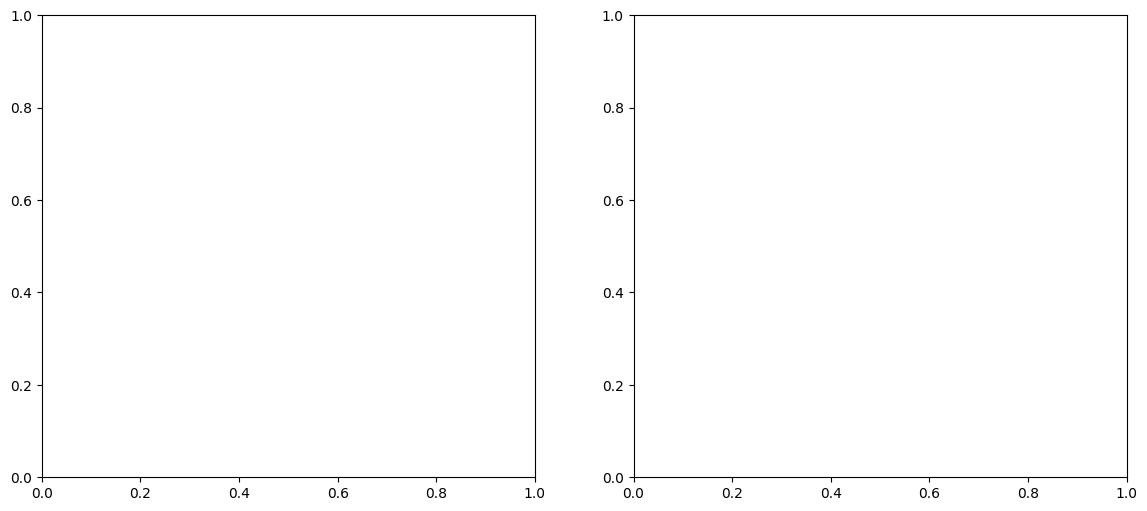

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Step 2: Visualizing duplicate rows count
plt.figure(figsize=(6, 4))
duplicate_row_count = data.duplicated().sum()
plt.bar(['Total Rows', 'Duplicate Rows'], [len(data), duplicate_row_count])
plt.title('Duplicate Rows in the Dataset')
plt.ylabel('Count')
plt.show()

# Step 3: Visualizing the distribution of Retweets and Likes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Retweets
axes[0].hist(data_cleaned['Retweets'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Retweets')
axes[0].set_xlabel('Number of Retweets')
axes[0].set_ylabel('Frequency')

# Histogram for Likes
axes[1].hist(data_cleaned['Likes'], bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Likes')
axes[1].set_xlabel('Number of Likes')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 4: Plotting Tweet Count over time
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Group by Date and sum up the tweet counts
tweet_count_per_day = data_cleaned.groupby('Date')['Tweet Count'].sum()

# Plot the Tweet Count over time
plt.figure(figsize=(14, 6))
plt.plot(tweet_count_per_day.index, tweet_count_per_day.values, color='green', linewidth=2)
plt.title('Tweet Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Tweet Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()